# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(X)
print(y)

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [3]:
X.shape, X.ndim    # harus (6, 1)

((6,), 1)

In [4]:
X = X.reshape((-1, 1))
print(X)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [5]:
model = LinearRegression()
model

LinearRegression()

In [6]:
model.fit(X, y)

LinearRegression()

In [7]:
r_squared = model.score(X, y)
print("Coefficient of determination:", r_squared)

Coefficient of determination: 0.7158756137479542


In [8]:
y_pred = model.predict(X)
print("data input:", X.flatten())
print("predictions:", y_pred)
print("true target:", y)
print("base model (mean):", [y.mean().tolist()]*X.shape[0])

data input: [ 5 15 25 35 45 55]
predictions: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
true target: [ 5 20 14 32 22 38]
base model (mean): [21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332]


In [9]:
print("model coefficient:", model.coef_)
print("model intercept:", model.intercept_)

model coefficient: [0.54]
model intercept: 5.633333333333329


In [10]:
# w0 + w1x1 atau b + ax
model.intercept_ + model.coef_*[15]

array([13.73333333])

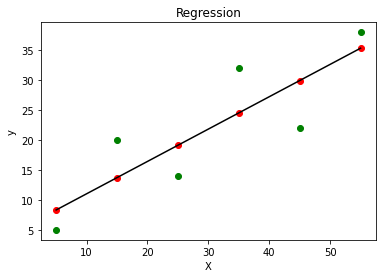

In [11]:
plt.scatter(X, y, c="green")
plt.plot(X, y_pred, c="black")
plt.scatter(X, y_pred, c="red")

plt.title("Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
new_data = np.arange(5).reshape((-1, 1))
print(new_data)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [13]:
model.predict(new_data)

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

In [14]:
X = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(X, X.shape)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] (8, 2)
[ 4  5 20 14 32 22 38 43]


In [15]:
mv_model = LinearRegression()
mv_model.fit(X, y)

mv_r2 = mv_model.score(X, y)
mv_coef = mv_model.coef_
mv_bias = mv_model.intercept_
print("Coefficient of determination:", mv_r2)
print("Coefficient/Parameters/Weights:", mv_coef)
print("Slope/Bias:", mv_bias)

Coefficient of determination: 0.8615939258756775
Coefficient/Parameters/Weights: [0.44706965 0.25502548]
Slope/Bias: 5.52257927519819


In [16]:
y_pred = mv_model.predict(X)
print("true y:", y)
print("predictions:", y_pred.round(2))

true y: [ 4  5 20 14 32 22 38 43]
predictions: [ 5.78  8.01 12.74 17.97 23.98 29.47 38.78 41.27]


In [17]:
# w0 + w1x1 + w2x2
(mv_bias + mv_coef.dot(X[-1])).round(2)

41.27

In [18]:
X = np.array([[5], [15], [25], [35], [45], [55]])
y = np.array([15, 11, 2, 8, 25, 32])

print(X, X.shape)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] (6, 1)
[15 11  2  8 25 32]


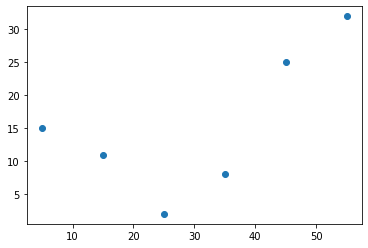

In [19]:
plt.scatter(X, y)
plt.show()

In [20]:
poly = PolynomialFeatures(include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [21]:
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [22]:
poly_X = poly.transform(X)
print(poly_X)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [23]:
poly_model = LinearRegression()
poly_model.fit(poly_X, y)

poly_r2 = poly_model.score(poly_X, y)
poly_coef = poly_model.coef_
poly_bias = poly_model.intercept_
print("Coefficient of determination:", poly_r2)
print("Coefficient/Parameters/Weights:", poly_coef)
print("Slope/Bias:", poly_bias)

y_pred = poly_model.predict(poly_X)
print("True Target:", y)
print("Predictions:", y_pred)

Coefficient of determination: 0.8908516262498563
Coefficient/Parameters/Weights: [-1.32357143  0.02839286]
Slope/Bias: 21.37232142857144
True Target: [15 11  2  8 25 32]
Predictions: [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


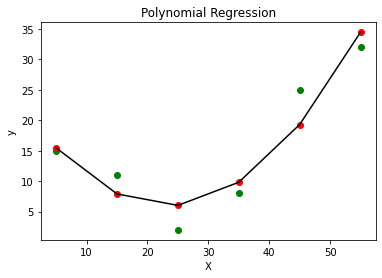

In [24]:
plt.scatter(X, y, c="green")
plt.plot(X, y_pred, c="black")
plt.scatter(X, y_pred, c="red")

plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

[[5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02]
 [1.500000e+01 2.250000e+02 3.375000e+03 5.062500e+04]
 [2.500000e+01 6.250000e+02 1.562500e+04 3.906250e+05]
 [3.500000e+01 1.225000e+03 4.287500e+04 1.500625e+06]
 [4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [5.500000e+01 3.025000e+03 1.663750e+05 9.150625e+06]]
Coefficient of determination: 0.9996871368552784
Coefficient/Parameters/Weights: [ 3.67175926e+00 -3.44062500e-01  9.90740741e-03 -8.54166667e-05]
Slope/Bias: 4.08550347273416
True Target: [15 11  2  8 25 32]
Predictions: [15.02777778 10.86111111  2.27777778  7.72222222 25.13888889 31.97222222]


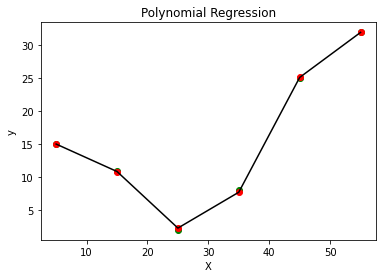

In [25]:
# generate polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_X = poly.fit_transform(X)
print(poly_X)

# fit polynomial features to linear regressions
poly_model = LinearRegression()
poly_model.fit(poly_X, y)

# evaluate metrics
poly_r2 = poly_model.score(poly_X, y)
poly_coef = poly_model.coef_
poly_bias = poly_model.intercept_
print("Coefficient of determination:", poly_r2)
print("Coefficient/Parameters/Weights:", poly_coef)
print("Slope/Bias:", poly_bias)

# predict
y_pred = poly_model.predict(poly_X)
print("True Target:", y)
print("Predictions:", y_pred)

# visualize results
plt.scatter(X, y, c="green")
plt.plot(X, y_pred, c="black")
plt.scatter(X, y_pred, c="red")

plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
data = load_boston()
# print(data.DESCR)

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [27]:
display(df.head())
display(target.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [28]:
X = df
y = target["MEDV"]

# modeling linear regression
lr = LinearRegression()
lr.fit(X, y)

predictions = lr.predict(X)

# evaluation
print("R-squared:", lr.score(X, y))

R-squared: 0.7406426641094095


In [29]:
df["targets"] = y
df["predictions"] = predictions

In [30]:
# manual r-squared
1 - ((df.targets - df.predictions)**2).sum() / (((df.targets - df.targets.mean()))**2).sum()

0.7406426641094095

In [31]:
df.sample(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets,predictions
345,0.03113,0.0,4.39,0.0,0.4420,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53,17.5,16.545011
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0,43.189498
28,0.77299,0.0,8.14,0.0,0.5380,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4,19.547373
145,2.37934,0.0,19.58,0.0,0.8710,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80,13.8,12.035853
122,0.09299,0.0,25.65,0.0,0.5810,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5,20.557386
312,0.26169,0.0,9.90,0.0,0.5440,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,19.4,23.281340
383,7.99248,0.0,18.10,0.0,0.7000,5.520,100.0,1.5331,24.0,666.0,20.2,396.90,24.56,12.3,13.061775
70,0.08826,0.0,10.81,0.0,0.4130,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2,25.201489
440,22.05110,0.0,18.10,0.0,0.7400,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11,10.5,12.706097
495,0.17899,0.0,9.69,0.0,0.5850,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,23.1,16.885420
